# Tutorial: The Main Weakness: Overfitting in Trees

Kita telah melihat betapa kuatnya `DecisionTreeRegressor` dalam menangani data non-linear. Fleksibilitasnya adalah kekuatan terbesarnya, tetapi juga merupakan sumber kelemahan terbesarnya: **kecenderungan yang sangat kuat untuk overfitting**.

Di notebook ini, kita akan menyelami lebih dalam mengapa dan bagaimana Decision Tree bisa overfitting, dan bagaimana kita bisa mendeteksinya secara visual dan kuantitatif.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan mengapa Decision Tree yang tidak dibatasi (unconstrained) secara alami akan overfitting.
* Memvisualisasikan bagaimana model Decision Tree yang overfitting terlihat.
* Menggunakan perbandingan error pada data pelatihan dan pengujian untuk membuktikan adanya overfitting.
* Memahami bahwa model yang sempurna pada data pelatihan bukanlah model yang baik.


---
### 2. Setup: Menggunakan Data yang Sama

Kita akan melanjutkan dengan data non-linear dan train-test split yang sama untuk konsistensi.


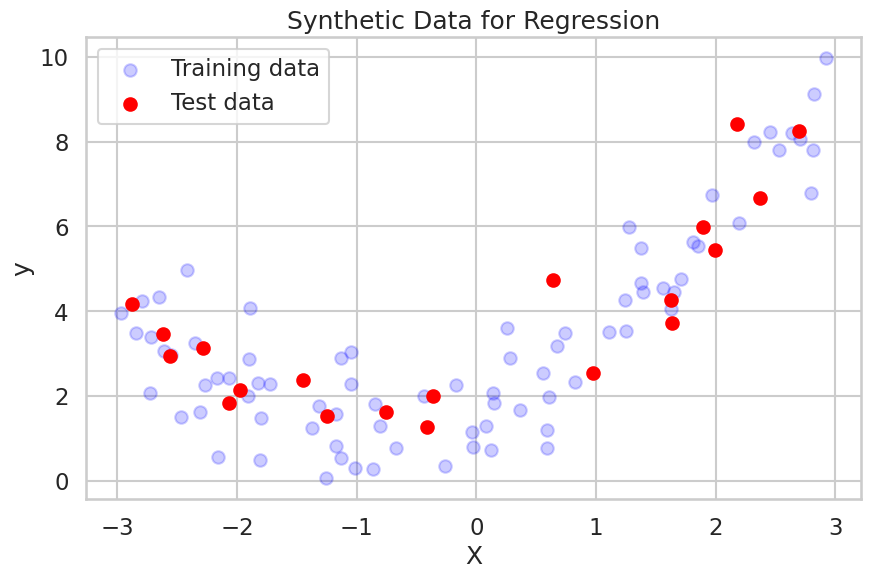

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

sns.set_theme(style="whitegrid", context="talk")

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', label='Training data', alpha=0.2)
plt.scatter(X_test, Y_test, color='red', label='Test data')
plt.title("Synthetic Data for Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

---
### 3. Mengapa Pohon Overfit? Intuisi

Bayangkan kembali cara kerja Decision Tree: ia terus mengajukan pertanyaan untuk memecah data menjadi kelompok yang lebih kecil dan lebih murni.

**Jika kita tidak memberinya aturan untuk berhenti**, pohon akan terus memecah data sampai ia mencapai kondisi idealnya: **setiap *leaf node* hanya berisi satu sampel data pelatihan.**

Pada titik ini, prediksi untuk setiap sampel pelatihan adalah nilai dari sampel itu sendiri. Kesalahan pada data pelatihan menjadi **nol**. Model telah **menghafal** data pelatihan dengan sempurna, termasuk semua noise acaknya.

Model seperti ini tidak belajar pola umum; ia hanya menjadi kamus yang sangat spesifik untuk data pelatihan dan akan gagal total pada data baru.


---
### 4. Demonstrasi Visual Overfitting

Mari kita latih dua model Decision Tree:
1.  **Pohon yang Dibatasi (`max_depth=3`):** Model yang lebih sederhana.
2.  **Pohon yang Tidak Dibatasi (default):** Model yang dibiarkan tumbuh sebebas-bebasnya.


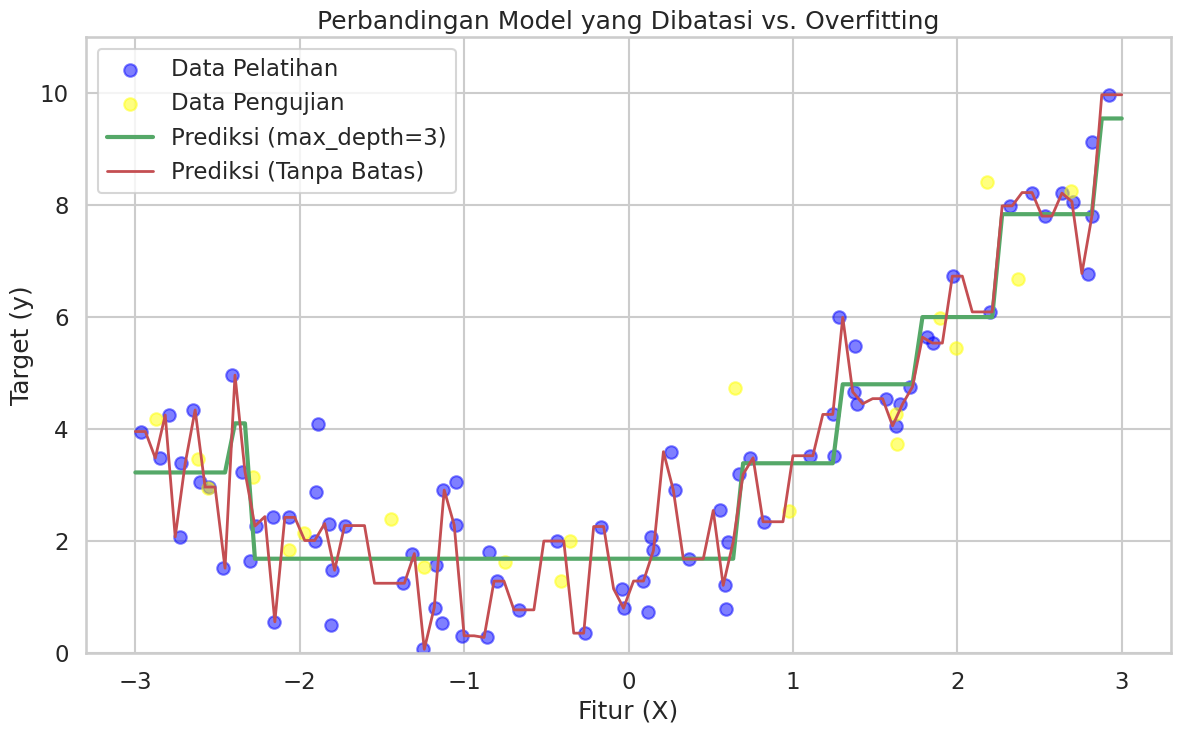

In [14]:
# tree overfitting example
tree_reg_overfit = DecisionTreeRegressor(random_state=42)
tree_reg_overfit.fit(X_train, Y_train)

# tree masuk akal
tree_reg_sane = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_sane.fit(X_train, Y_train)

# buat data baru
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
Y_pred_sane = tree_reg_sane.predict(X_new)
Y_pred_overfit = tree_reg_overfit.predict(X_new)

# Visualisasi
plt.figure(figsize=(14, 8))
plt.scatter(X_train, Y_train, alpha=0.5, color="blue",label='Data Pelatihan')
plt.scatter(X_test, Y_test, alpha=0.5, color="yellow", label='Data Pengujian')
plt.plot(X_new, Y_pred_sane, "g-", linewidth=3, label="Prediksi (max_depth=3)")
plt.plot(X_new, Y_pred_overfit, "r-", linewidth=2, label="Prediksi (Tanpa Batas)")

plt.title("Perbandingan Model yang Dibatasi vs. Overfitting", fontsize=18)
plt.xlabel('Fitur (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.ylim(0, 11)
plt.show()

**Analisis Visual:**

* **Garis Hijau (`max_depth=3`):** Menangkap tren umum dari data dengan cukup baik. Prediksinya terlihat masuk akal.
* **Garis Merah (Tanpa Batas):** Sangat "bergerigi" dan tidak stabil. Ia mencoba untuk sedekat mungkin dengan setiap titik data pelatihan. Jelas sekali ia telah **overfitting** terhadap data pelatihan.


---
### 5. Bukti Kuantitatif: Membandingkan Error

Cara terbaik untuk mendeteksi overfitting adalah dengan membandingkan performa model pada data pelatihan dan data pengujian.

* **Model yang baik:** Error pada data pelatihan dan pengujian akan relatif dekat.
* **Model yang overfitting:** Error pada data pelatihan akan **sangat rendah**, sementara error pada data pengujian akan **jauh lebih tinggi**.


In [20]:
Y_train_pred_sane = tree_reg_sane.predict(X_train)
Y_test_pred_sane = tree_reg_sane.predict(X_test)

rmse_train_sane = np.sqrt(mean_squared_error(Y_train, Y_train_pred_sane))
rmse_test_sane = np.sqrt(mean_squared_error(Y_test, Y_test_pred_sane))

print(f"----- model dengan max depth = 3 -----")
print(f"RMSE pada data pelatihan: {rmse_train_sane:.4f}")
print(f"RMSE pada data pengujian: {rmse_test_sane:.4f}")

print("\n"+"="*20)

Y_train_pred_overfit = tree_reg_overfit.predict(X_train)
Y_test_pred_overfit = tree_reg_overfit.predict(X_test)

rmse_train_overfit = np.sqrt(mean_squared_error(Y_train, Y_train_pred_overfit))
rmse_test_overfit = np.sqrt(mean_squared_error(Y_test, Y_test_pred_overfit))

print(f"\n----- model dengan default -----")
print(f"RMSE pada data pelatihan: {rmse_train_overfit:.4f}")
print(f"RMSE pada data pengujian: {rmse_test_overfit:.4f}")

----- model dengan max depth = 3 -----
RMSE pada data pelatihan: 0.8173
RMSE pada data pengujian: 0.8899


----- model dengan default -----
RMSE pada data pelatihan: 0.0000
RMSE pada data pengujian: 0.9583


tree_reg_overfit depth = 13
tree_reg_sane depth = 3


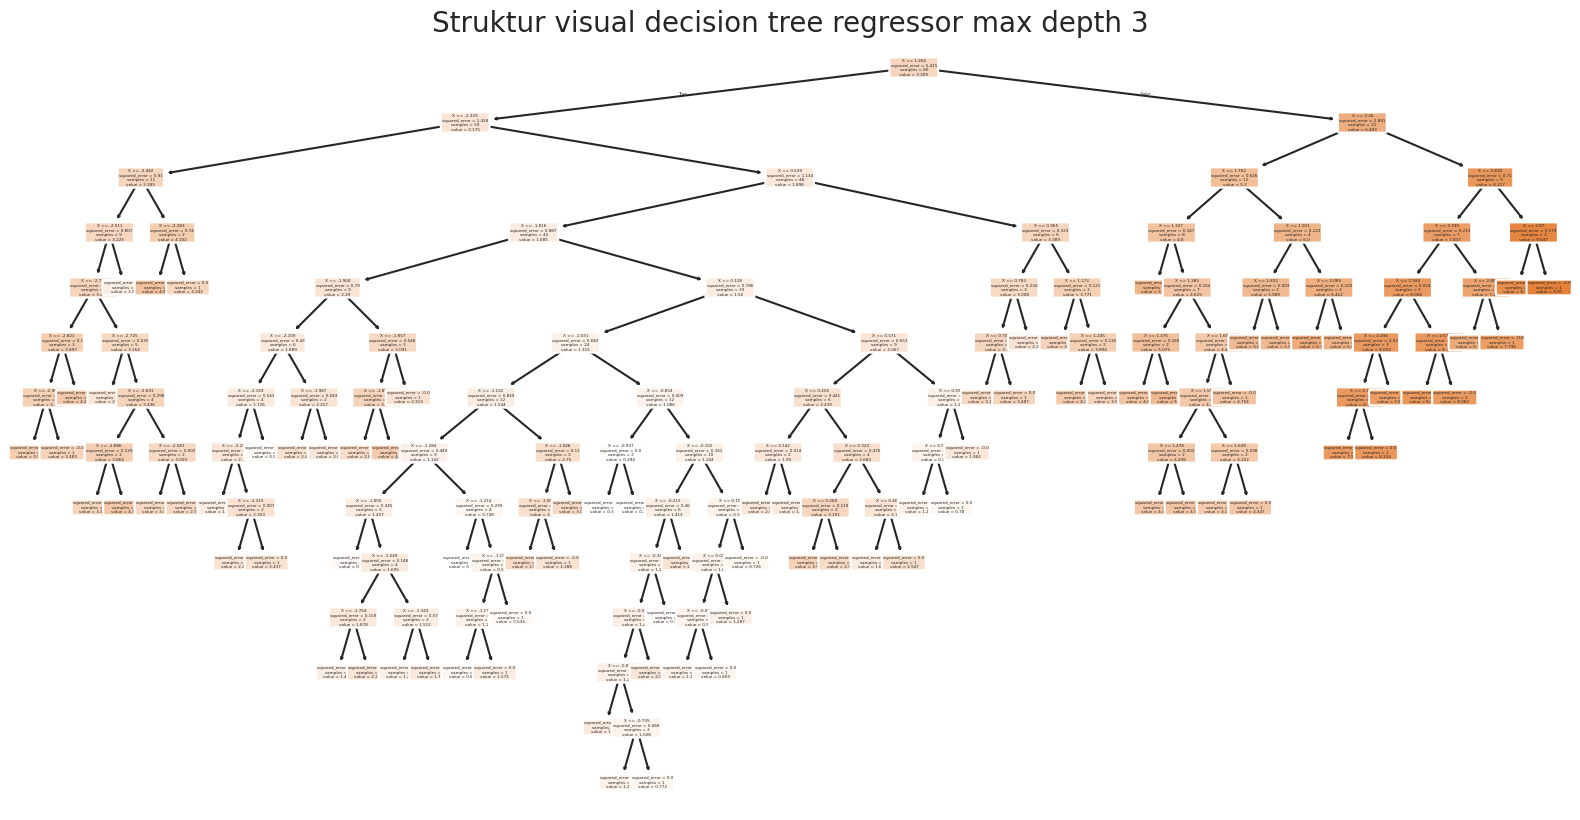

In [45]:
print(f"tree_reg_overfit depth = {tree_reg_overfit.get_depth()}")
print(f"tree_reg_sane depth = {tree_reg_sane.get_depth()}")

plt.figure(figsize=(20,10))

plot_tree(
    tree_reg_overfit,
    feature_names=["X"],
    filled=True,
    rounded=True,
    fontsize=3
)

plt.title("Struktur visual decision tree regressor max depth 3", fontsize=20)
plt.show()

**Analisis Kuantitatif:**

* **Model yang Dibatasi:** Error pelatihan (0.81) dan pengujian (0.88) sangat **dekat**. Ini adalah tanda model yang sehat dan mampu menggeneralisasi dengan baik.

* **Model yang Overfitting:** Lihatlah perbedaannya! Error pada data pelatihan adalah **nol**! Model ini telah menghafal data pelatihan dengan sempurna. Namun, saat dihadapkan pada data pengujian yang baru, errornya **melompat** menjadi 1.05. Celah besar antara error pelatihan dan pengujian ini adalah **definisi klasik dari overfitting**.


### Kesimpulan

* Decision Tree yang tidak dibatasi adalah model dengan **varians yang sangat tinggi** dan hampir pasti akan **overfitting**.
* Overfitting dapat dideteksi dengan membandingkan performa model pada data pelatihan vs. data pengujian. Celah performa yang besar adalah tanda bahaya.
* Kita tidak bisa mempercayai Decision Tree yang tidak "diatur".

**Selanjutnya:**
Sekarang kita tahu masalahnya, bagaimana cara memperbaikinya? Di subchapter berikutnya, kita akan belajar cara **meregularisasi** Decision Tree dengan menyesuaikan *hyperparameter*-nya untuk mencegah overfitting dan membangun model yang lebih kuat.
